## 4 Lab work
## Numerical methods in statistics
Bieliukina Tetiana

The purpose of the work: using clustering methods to find out whether 3 species of trilobes are different from each other: Stenopareia glaber from Ashgill, Norway (glaber.dat), S. linnarssoni from Norway (linnars1.dat) and Sweden (linnars2.dat)

We are preparing for work - we import the necessary libraries and prepare the dataset

In [184]:
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra)
library(caret)

In [185]:
glaber <- read.table("glaber.dat", header=TRUE, row.names='.')
linnars1 <- read.table("linnars1.dat", header=TRUE, row.names='.')
linnars2 <- read.table("linnars2.dat", header=TRUE, row.names='.')

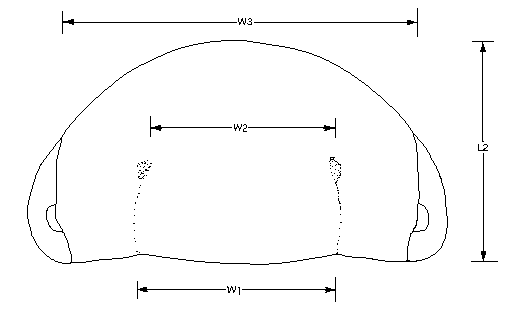

For each species, 3 metrics were measured - L2, W1, W2, W3, shown in the figure

In [186]:
head(glaber)

,L2,W1,W2,W3
,<dbl>,<dbl>,<dbl>,<dbl>
1,19.4,9.0,8.1,18.4
2,16.3,8.9,8.0,18.6
3,13.0,7.0,6.2,14.0
4,10.7,5.5,5.0,12.5
5,17.0,9.0,7.7,17.7
6,16.9,8.5,7.5,17.0


In [187]:
linnars1

,L2,W1,W2,W3
,<dbl>,<dbl>,<dbl>,<dbl>
1,28.1,15.8,13.7,29.3
2,13.2,8.3,8.0,15.0
3,19.3,11.5,10.4,21.3
4,16.7,10.7,9.5,18.0
5,24.6,15.7,14.5,28.9
6,33.8,20.5,18.0,37.0
7,9.0,5.3,4.8,10.8
8,20.5,12.0,11.7,22.7
9,24.7,13.5,13.2,25.2


In [188]:
linnars2

,L2,W1,W2,W3
,<dbl>,<dbl>,<dbl>,<dbl>
1,26.5,17.3,15.9,30.7
2,33.2,19.0,16.8,35.0
3,31.9,20.0,18.2,33.0
4,32.0,20.0,17.8,34.4
5,39.3,24.7,22.3,40.0
6,24.5,14.3,12.5,25.6
7,31.5,19.7,18.4,34.3


All 3 types are distributed in different datasets, for the clustering task I combine them into one large dataset and add indices, remember that indices 1-43 include data from glaber, 44-53 - from linnars1 and 54-60 - from linnars2

In [154]:
data <- rbind(glaber,linnars1)
data <- rbind(data,linnars2)
data <- scale(data)
rownames(data) <- c(1:60)

In [183]:
head(data)

,L2,W1,W2,W3
1,0.006957928,-0.4245493,-0.3884230,-0.3540704
2,-0.455247286,-0.4473337,-0.4134529,-0.3251470
3,-0.947272191,-0.8802373,-0.8639919,-0.9903848
4,-1.290198641,-1.2220033,-1.1643511,-1.2073102
5,-0.350878367,-0.4245493,-0.4885427,-0.4553022
6,-0.365788212,-0.5384713,-0.5386026,-0.5565341


For clustering, try using the k-means method, with 3 centroids.

In [158]:
k2 <- kmeans(data, centers = 3)
table(k2$cluster)

Let's visualize the resulting clustering.

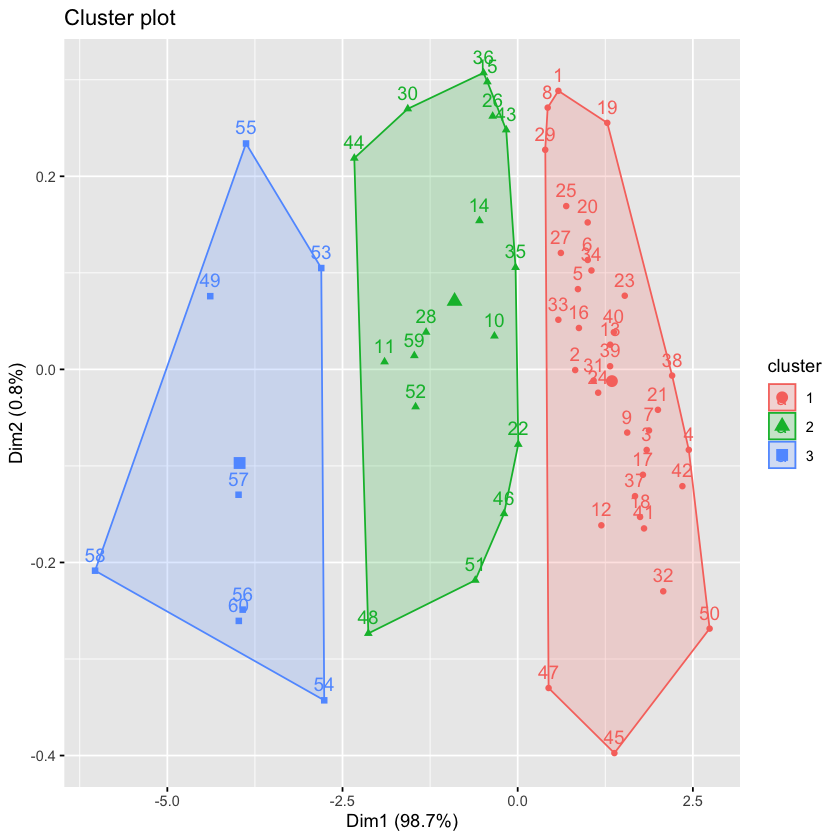

In [160]:
fviz_cluster(k2, data = data)


Evaluating by eye, we see that the indices were distributed quite similar to the real data, but it is still so difficult to evaluate, let's try to present our results in the form of a confusion matrix

In [167]:
test1 <- data.frame(index = names(k2$cluster[k2$cluster == 1]))
test1$pred <- 1
test2 <- data.frame(index = names(k2$cluster[k2$cluster == 2]))
test2$pred <- 2
test3 <- data.frame(index = names(k2$cluster[k2$cluster == 3]))
test3$pred <- 3
test3

In [171]:
test <- rbind(test1,test2)
test <- rbind(test,test3)
test$real <- with(test, ifelse((53 < index) & (index < 61), 3,
                         ifelse((43 < index) & (index < 54), 2, 1)))

In [180]:
confusionMatrix(data=factor(test$pred), reference = factor(test$real))

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3
         1 30  4  1
         2 11  5  1
         3  0  2  6

Overall Statistics
                                          
               Accuracy : 0.6833          
                 95% CI : (0.5504, 0.7974)
    No Information Rate : 0.6833          
    P-Value [Acc > NIR] : 0.5617          
                                          
                  Kappa : 0.4044          
                                          
 Mcnemar's Test P-Value : 0.2035          

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.7317  0.45455   0.7500
Specificity            0.7368  0.75510   0.9615
Pos Pred Value         0.8571  0.29412   0.7500
Neg Pred Value         0.5600  0.86047   0.9615
Prevalence             0.6833  0.18333   0.1333
Detection Rate         0.5000  0.08333   0.1000
Detection Prevalence   0.5833  0.28333   0.1333
Balanced Accuracy      0.7343  0.60482   0.8558

The accuracy of our separation is 0.6833, quite a good result, that is, these 3 species of trilobes really have differences, but we can also notice that Stenopareia glaber from Ashgill, Norway (glaber.dat) and S. linnarssoni from Norway have more similar characteristics than trilobes from Sweden.

Using the elbow method, we can also check whether the division into 3 clusters is indeed optimal

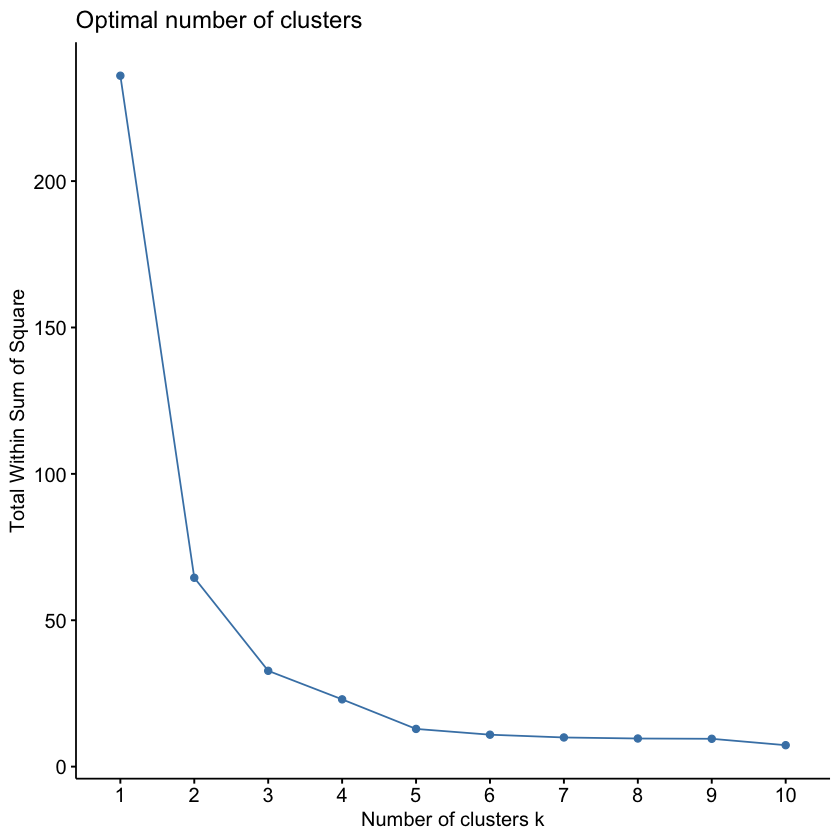

In [70]:
set.seed(123)

fviz_nbclust(data, kmeans, method = "wss")

Дійсно, поділ на 3 кластери виявився оптимальним